# Homework 5: Stochastic gradient algorithms#


Link to homework - http://www.harchaoui.eu/zaid/teaching/nyu/fall2015/cml_hw5.pdf

### 2) Linear Support Vector Machines ###
#### 2.1 Linear SVMs with gradient descent####
##### 2.1.1 #####

In [30]:
%matplotlib inline
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

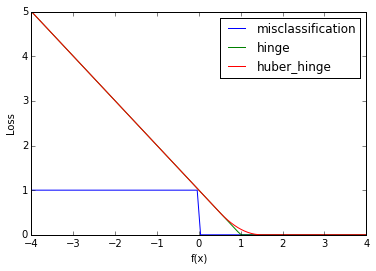

In [31]:
'''
Plotting the misclassification error loss, the (regular) hinge 
loss and the huberized hinge loss.

'''
f_x = np.linspace(-4, 4, 100)


def misclassification(f_x):
    return [1 if i <= 0 else 0 for i in f_x ]

def hinge(f_x):
    #consider y (predicted value) = 1
    return [np.max([0, 1-i]) for i in f_x ]

def huber_hinge(y, t ):
    
    z = y*t
    h = 0.5
    
    loss = [0]*z.shape[0]
    for i, x in enumerate(z):
        if x > 1+h:
            loss[i] = 0
        elif abs(1-x) <= h:
            loss[i] = ((1+h-x)**2)/(4*h)
        else:
            loss[i] = 1-x
    return loss

plt.plot(f_x, misclassification(f_x), label = 'misclassification')
plt.plot(f_x, hinge(f_x), label = 'hinge')
plt.plot(f_x, huber_hinge(1, f_x), label = 'huber_hinge')


plt.legend(loc="upper right")
plt.xlabel("f(x)")
plt.ylabel("Loss")


##### 2.1.2 Analytic expressions #####

In [32]:
def compute_obj(w, X, y):
        
    f_x = np.dot(X, w)
    n = X.shape[0]
        
    F = np.dot(w,w) + float(C/n) * np.dot(huber_hinge(y, f_x), np.ones(X.shape[0]))

    return F

#compute derivative of huber hinge loss function
def huber_diff(Y,T):
    
    h = 0.5
    
    loss = [0]*Y.shape[0]
    
    for i, (y, t) in enumerate(zip(Y,T)):
        if y*t > 1+h:
            loss[i] = 0
        elif abs(1-y*t) <= h:
            loss[i] = -((1+h-y*t)*y)/(2*h)
        else:
            loss[i] = -y
    return loss

def compute_grad(w, X, y):

    f_x = np.dot(X,w)
    n = X.shape[0]
        
    G = 2* w + float(C/n) * np.dot(huber_diff(y, f_x),  X)
    return G

##### 2.1.3 Numerical checks #####


In [33]:
from sklearn import preprocessing

def grad_checker(compute_grad, compute_obj, X, y):
    e = 1e-4
    #print(X)
    check = []
    
    w = []
    for i in range(X.shape[1]):
        w.append(np.random.random())
        
    w = np.array(w)
    
    for index in range(X.shape[1]):
        
        basis = np.zeros(X.shape[1])
        basis[index] = 1.0
        
        w_plus = w + e * basis
        w_minus = w - e * basis
        num = (compute_obj(w_plus, X, y) - compute_obj(w_minus, X, y))/(2*e)
        check.append(num)    
        
    
    gradient = compute_grad(w, X, y)
    gradient = np.array(gradient)
    check = np.array(check)
  
    return np.linalg.norm(gradient - check)

##### 2.1.4 Gradient Descent #####

In [147]:
def my_gradient_descent(n, max_iter, X, y, compute_grad, compute_obj):
    
    w = np.zeros(X.shape[1])
   
    obj = [None]*max_iter
    
    error = np.zeros(max_iter)
    
    for i in range(max_iter):
        
        num_error = 0
        for X_i, y_i in zip(X, y):
            if (y_i * np.sign(np.dot(w,X_i)) <= 0):
                num_error += 1
        
        error[i] = num_error
         
        obj[i] = compute_obj(w, X, y)
        w = w - n* compute_grad(w,X, y)
        
        
    return w, obj, error



In [148]:
def dataset(n, dim):
   
    np.random.seed(0)
    C = np.array([[0., -0.25], [0.80, .25]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 2])]
    y = np.hstack((-1*np.ones(n), np.ones(n)))
    return X, y

x, y = dataset(500, 2)
x = np.column_stack( (x, np.ones(x.shape[0])))
x_norm = preprocessing.normalize(x)

x1, y1 = dataset(250, 2)
x1 = np.column_stack( (x1, np.ones(x1.shape[0])))
x1_norm = preprocessing.normalize(x1)

X_train, X_test, y_train, y_test = x_norm[250:], x_norm[:250], y[250:] , y[:250]
#X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.5)



In [149]:
print(grad_checker(compute_grad, compute_obj, X_train, y_train))


8.63626490509e-10


In [150]:
from sklearn.datasets import load_iris

41.4784762806


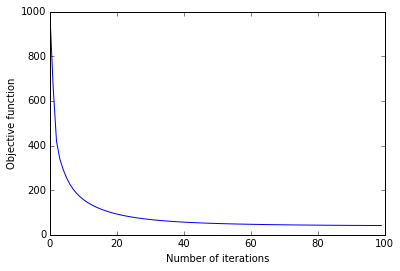

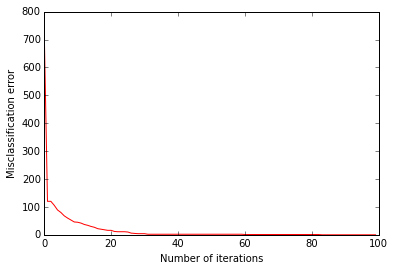

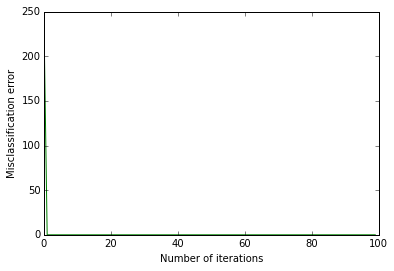

In [164]:
C= 1000
w, obj, error = my_gradient_descent(0.001, 100, X_train, y_train ,compute_grad, compute_obj)
index = [i for i in range (100)]

plt.plot(index, obj)
plt.xlabel("Number of iterations")
plt.ylabel("Objective function")
plt.figure()
plt.plot(index, error, "-r")
plt.xlabel("Number of iterations")
plt.ylabel("Misclassification error")



w1, obj1, error1 = my_gradient_descent(0.001, 100, X_test, y_test ,compute_grad, compute_obj)
plt.figure()
plt.plot(index, error1, "-g")
plt.xlabel("Number of iterations")
plt.ylabel("Misclassification error")


To optimize F and reduce the misclassification error, I modified the parameters C and n (step size). C= 1000 and n = 0.001 with number of iterations = 100 seems to give a misclassification error of 0 after about 25 iterations.



In [61]:
def my_svm(n, max_iter, X, y, compute_grad, compute_obj):
    g = []
    w = np.zeros(X.shape[1])
    for x in X:
        
        w, o, e = my_gradient_descent(n, max_iter, X, y, compute_grad, compute_obj)
       
        f_x = np.dot(w, x)
        g.append(int(np.sign(f_x)))
     
        
    return w, g, obj

n = 0.001
w, g, obj = my_svm(n,100,X_train, y_train, compute_grad, compute_obj)

 



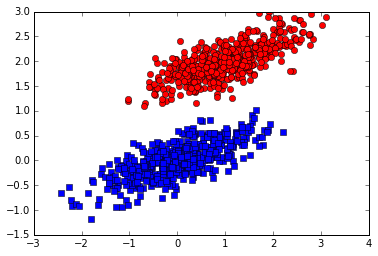

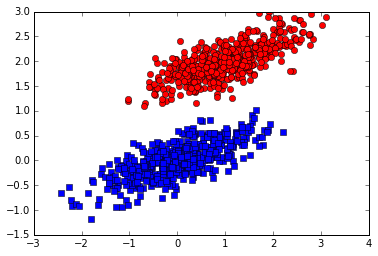

In [135]:
g = np.array(g)
X0, X1 = x[g == 1], x[g == -1]


plt.plot(X0[:, 0], X0[:,1], 'o', color='red')
plt.plot(X1[:, 0], X1[:, 1], 's', color='blue')

plt.figure()
X2, X3 = x[y == 1], x[y == -1]


plt.plot(X2[:, 0], X2[:,1], 'o', color='red')
plt.plot(X3[:, 0], X3[:, 1], 's', color='blue')



In [186]:
'''
gradient descent algorithm with backtracking line search

Reference: http://users.ece.utexas.edu/~cmcaram/EE381V_2012F/Lecture_4_Scribe_Notes.final.pdf
'''

def gradient_backtracking(max_iter, X, y,compute_grad, compute_obj):
    
    alpha = 0.1 # chosen between 0.01 and 0.3
    beta = 0.8 #between 0.1 and 0.8
    
    n = 1 #initial step size
    w = np.zeros(X.shape[1])
    
    obj = [None]*max_iter
    
    for k in range(max_iter):
        
        grad = compute_grad(w, X, y)
        obj[k] = compute_obj(w, X, y)
        
        while compute_obj((w - n*grad), X, y) > (compute_obj(w, X, y) - alpha*n* np.dot(grad, grad)):
            n = beta * n
        
        w = w- n*compute_grad(w, X, y)
        
    return w, obj

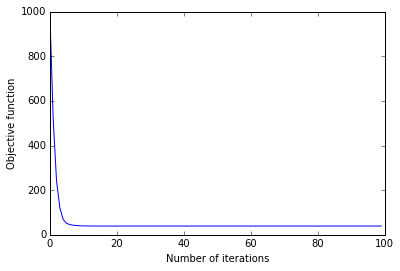

In [187]:
w, obj = gradient_backtracking( 100, X_train, y_train ,compute_grad, compute_obj)
index = [i for i in range (len(obj))]

plt.plot(index, obj)
plt.xlabel("Number of iterations")
plt.ylabel("Objective function")
plt.figure()

In [189]:
import cProfile
cProfile.run('gradient_backtracking( 100, X_train, y_train ,compute_grad, compute_obj)')

         103769 function calls in 0.234 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.234    0.234 <ipython-input-186-335616b243f2>:7(gradient_backtracking)
      342    0.098    0.000    0.103    0.000 <ipython-input-31-d9714a37192b>:16(huber_hinge)
      342    0.003    0.000    0.139    0.000 <ipython-input-32-361ba7a28397>:1(compute_obj)
      200    0.060    0.000    0.075    0.000 <ipython-input-32-361ba7a28397>:14(huber_diff)
      200    0.002    0.000    0.094    0.000 <ipython-input-32-361ba7a28397>:29(compute_grad)
        1    0.000    0.000    0.234    0.234 <string>:1(<module>)
      342    0.000    0.000    0.002    0.000 numeric.py:141(ones)
    99907    0.007    0.000    0.007    0.000 {abs}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
     1547    0.048    0.000    0.048    0.000 {numpy.core._dotblas.dot}
      342    0.00

After profiling the code, it is found that the bottlenecks are the functions huber_hinge and huber_diff. Previously, I was using the append function to add to the list that stored the loss function calculation. Adding an element by specifying the index (loss[i] = ...) improved the performance.